# 💠PCA💠

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,silhouette_score

import warnings
warnings.filterwarnings('ignore')

## 💠Exploratory Data Analysis (EDA)

In [2]:
data=pd.read_csv('wine.csv')
print('Shape of data ',data.shape)
data.head()

Shape of data  (178, 14)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [4]:
data.duplicated().sum()

0

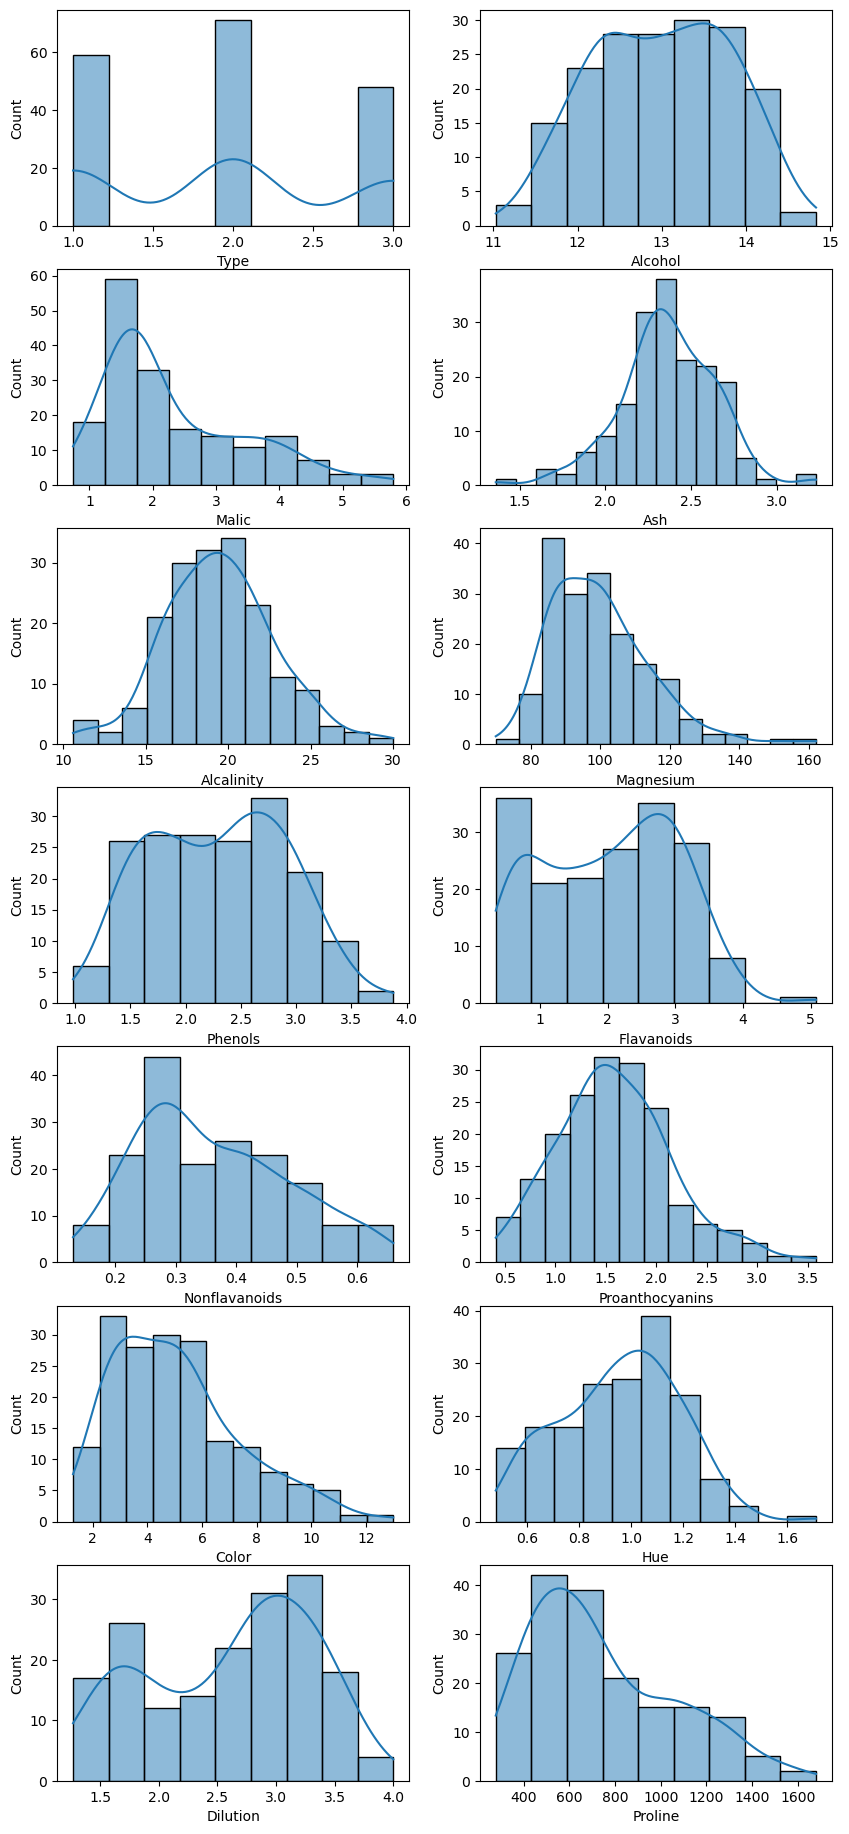

In [5]:
plt.figure(figsize=(10,23))

for i,j in enumerate(data.columns):
    plt.subplot(7,2,i+1)
    sns.histplot(data[j],kde=True)
plt.show()

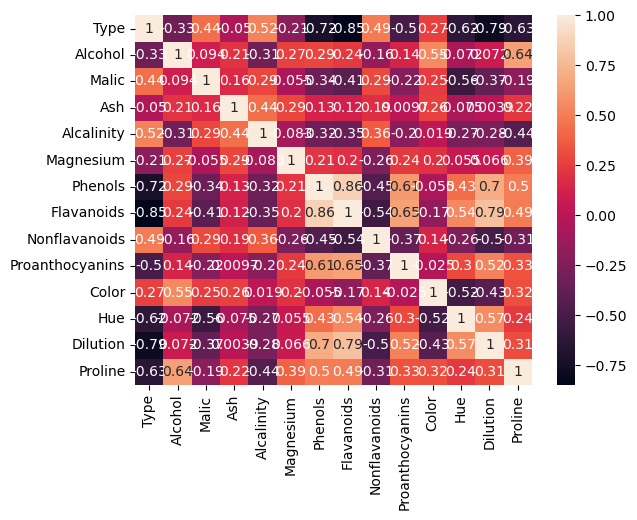

In [6]:
sns.heatmap(data.corr(),annot=True)
plt.show()

## 💠Data Pre-processing 

In [7]:
X=data.drop('Type',axis=1)
Y=data['Type']

StdSc=StandardScaler()
X_std=StdSc.fit_transform(X)
X=pd.DataFrame(X_std,columns=X.columns)
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## 💠Clustering with Original Data: KMeans

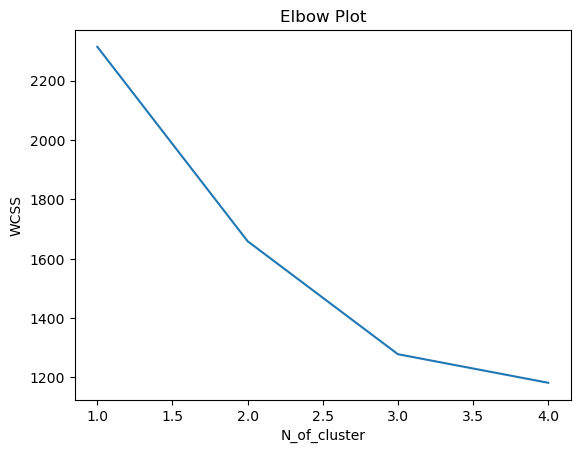

In [8]:
N_of_cluster=list(range(1,5))
wcss=[]

for n in N_of_cluster:
    model_kmeans=KMeans(n_clusters=n,max_iter=100,random_state=100)
    model_kmeans.fit(X)  
    wcss.append( model_kmeans.inertia_)
    
plt.plot(N_of_cluster,wcss)
plt.xlabel('N_of_cluster')
plt.ylabel('WCSS')
plt.title('Elbow Plot')
plt.show()

In [9]:
model_kmeans=KMeans(n_clusters=3,max_iter=200,random_state=100)
model_kmeans.fit(X) 

KMeans(max_iter=200, n_clusters=3, random_state=100)

In [10]:
data['Type_Kmeans']=model_kmeans.labels_

round(data.groupby('Type')['Type_Kmeans'].mean())

Type
1    0.0
2    2.0
3    1.0
Name: Type_Kmeans, dtype: float64

In [11]:
data['Type_Kmeans']=data['Type_Kmeans'].replace([0,1],[1,3])
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type_Kmeans
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


💠Accuracy of clustering  0.9662921348314607
💠Silhouette score of clustering  0.2848589191898987


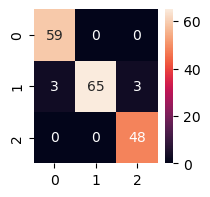

In [12]:
Ac_kmeans=accuracy_score(data['Type'],data['Type_Kmeans'])
silhouette_score_kmeans=silhouette_score(X,data['Type_Kmeans'])

print('💠Accuracy of clustering ',Ac_kmeans)
print('💠Silhouette score of clustering ',silhouette_score_kmeans)

conf_mat = confusion_matrix(data['Type'],data['Type_Kmeans'])
plt.figure(figsize=(2,2))
sns.heatmap(conf_mat,annot=True)
plt.show()

## 💠Clustering with PCA Data: KMeans with LDA

In [35]:
PCA_matrix=PCA(n_components=len(X.columns))
PCA_matrix.fit(X)

PCA(n_components=13)

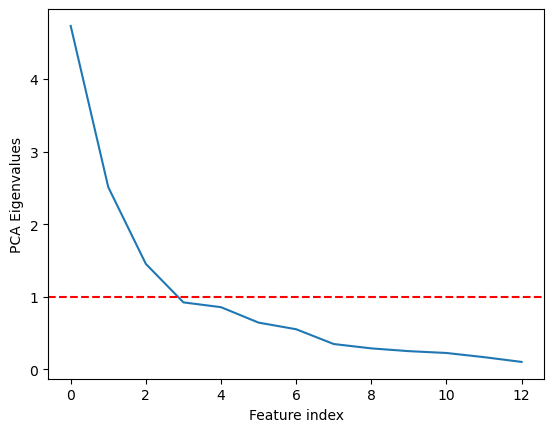

In [36]:
plt.plot(PCA_matrix.explained_variance_)
plt.axhline(y=1,color='r',linestyle='--')
plt.xlabel('Feature index')
plt.ylabel('PCA Eigenvalues')
plt.show()

In [37]:
PCA_matrix=PCA(n_components=4)
X_pca=PCA_matrix.fit_transform(X)
X_pca=pd.DataFrame(X_pca)   
X_pca

,0,1,2,3
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,1.058527
174,-2.601956,-1.757229,0.207581,0.349496
175,-2.677839,-2.760899,-0.940942,0.312035
176,-2.387017,-2.297347,-0.550696,-0.688285


In [38]:
model_kmeans_pca=KMeans(n_clusters=3,max_iter=200,random_state=100)
model_kmeans_pca.fit(X_pca) 

KMeans(max_iter=200, n_clusters=3, random_state=100)

In [39]:
data['Type_Kmeans_pca']=model_kmeans_pca.labels_

round(data.groupby('Type')['Type_Kmeans_pca'].mean())

Type
1    0.0
2    2.0
3    1.0
Name: Type_Kmeans_pca, dtype: float64

In [40]:
data['Type_Kmeans_pca']=data['Type_Kmeans_pca'].replace([0,2,1],[1,2,3])
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Type_Kmeans,Type_Kmeans_pca
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1


💠Accuracy of clustering  0.949438202247191
💠Silhouette score of clustering with PCA  0.40659691089486616


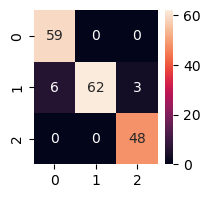

In [41]:
Ac_pca_kmeans=accuracy_score(data['Type'],data['Type_Kmeans_pca'])
silhouette_score_pca=silhouette_score(X_pca,data['Type_Kmeans_pca'])

print('💠Accuracy of clustering ',Ac_pca_kmeans)
print('💠Silhouette score of clustering with PCA ',silhouette_score_pca)

conf_mat_pca = confusion_matrix(data['Type'],data['Type_Kmeans_pca'])
plt.figure(figsize=(2,2))
sns.heatmap(conf_mat_pca,annot=True)
plt.show()

## 💠Comparison and Analysis
#### ▶ In can be observed that both the algorithm gives a good accuracy of more than 90%.
#### ▶ The Silhouette_score suggests the cluster formed with LDA gives better quality of clusters with less number of features.
#### ▶ Where as from confusion matrix it can be seen that there in a slight inaccuracy in clustering Type-2 wine by both the algorithms.

In [45]:
Compare={'Model':['model_kmeans','model_kmeans_pca'],
      'Accuracy_score':[Ac_kmeans,Ac_pca_kmeans],
      'Silhouette_score':[silhouette_score_kmeans,silhouette_score_pca]}

Compare=pd.DataFrame(Compare).set_index('Model')
Compare

,Accuracy_score,Silhouette_score
Model,,
model_kmeans,0.966292,0.284859
model_kmeans_pca,0.949438,0.406597


## 💠Conclusion and Insights
#### ▶ PCA with clustering can significantly enhance data analysis by simplifying datasets, improving visualization, and making clustering more effective by reducing noise and dimensionality of data. Reducing dimensionality before clustering can speed up algorithms like k-means or hierarchical clustering, making them computationally more efficient.
#### ▶ PCA and KMeans can be used together when the data sets have high-dimentionality ,large size, multicollinearity to  Identifying Group Patterns in Unlabeled data. 
##### Marketing: Helps in customer segmentation and targeting by identifying distinct customer profiles.
##### Biology: Useful in genomics and proteomics for analyzing and clustering gene expression data.